In [2]:
import pandas as pd
from sympy.solvers import solve
from sympy import Symbol
import plotly.graph_objs as go
import plotly.express as px

In [12]:
surface = 2000000 #m^2
Q = 20 #m^3/s 
b = 10 #m and مستطیل
g = 10

Time = [i for i in range(17)]
Qs = [19, 25, 40, 65, 100,
      140, 190, 230,
      250, 230, 190, 140, 100, 65, 40, 25, 19]
df = pd.DataFrame({'zaman(hr)': Time,
              'debi_voroodi(m^3/s)': Qs})
''',
              'debi_khorooji(m^3/s)': Qouts})'''
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
zaman(hr),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
debi_voroodi(m^3/s),19,25,40,65,100,140,190,230,250,230,190,140,100,65,40,25,19


# puls method
## in each time step: $I.\Delta T - O.\Delta T = \Delta V $

### steep: 
### $ Q = A*V $

### and:

### $ A = 1.5y_c^2 + 40y_c $ also $ V_c = \sqrt{gy_c} $

In [15]:
yc = 0.73
b = 10
A = lambda y: b * y
T= lambda y: b
D = lambda y: A(y) / T(y) 
Hc = yc + (D(yc)/2)
Hc

1.095

In [27]:
Heads = [Hc, 2, 2.5, 3, 2.5, 4]
#----------------------------------------------------------------
Ys = []
for i in Heads:
    y = Symbol('y')
    javab = solve(y + (D(y)/2) - i,y)
    Ys.append(float(javab[0]))
#----------------------------------------------------------------
Vs = [(g * i)**0.5 for i in Ys]
#----------------------------------------------------------------
Q_out = []
for i in range(len(Ys)):
    area = A(Ys[i])
    speed = Vs[i] 
    Q_out.append(area*speed)
#----------------------------------------------------------------
Vol = []
V = 0
Vol.append(V)
for i in range(len(Heads)):
    try:
        H1 = Heads[i]
        H2 = Heads[i+1]
        V = (surface * (H2 - H1)) + V
        Vol.append(V)
    except:
        pass
#----------------------------------------------------------------
VperdeltaT = [(i / (0.5 * 60 * 60)) for i in Vol]
#----------------------------------------------------------------
N = []
for i in range(len(Q_out)):
    O2vom = Q_out[i] / 2
    n = O2vom + VperdeltaT[i]
    N.append(n)
df1 = pd.DataFrame({'Heads': Heads, 'Y(c)': Ys, 'V(c)': Vs,
                    "Q out": Q_out, 'V': Vol, "V / DT": VperdeltaT, "N": N})
df1

,Heads,Y(c),V(c),Q out,V,V / DT,N
0,1.095,0.730000,2.701851,27.202088,0.0,0.000000,13.601044
1,2.000,1.333333,3.651484,67.146913,1810000.0,1005.555556,1039.129012
2,2.500,1.666667,4.082483,93.840664,2810000.0,1561.111111,1608.031443
3,3.000,2.000000,4.472136,123.356757,3810000.0,2116.666667,2178.345045
4,2.500,1.666667,4.082483,93.840664,2810000.0,1561.111111,1608.031443
5,4.000,2.666667,5.163978,189.920151,5810000.0,3227.777778,3322.737853


In [20]:
px.line(x = N, y = Q_out)

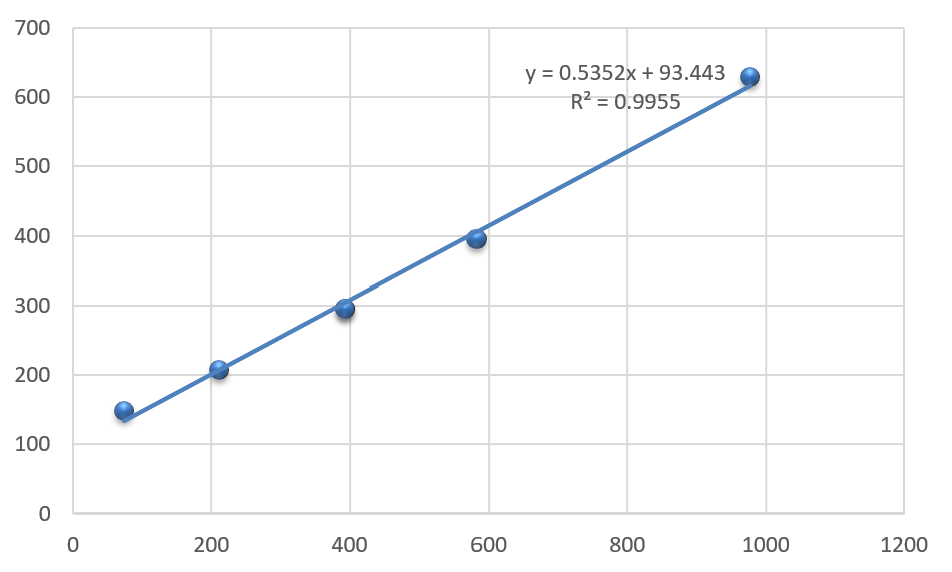

In [7]:
import IPython.display as ds
ds.Image('soal2_fited.png')

In [21]:
import numpy as np
x = np.array(df1.N)
y = np.array(Q_out)
m, b = np.polyfit(x, y, 1)
m, b

(0.03601256653872138, 13.791704670685712)

In [22]:
O = lambda N: m * N + b

In [23]:
meanI = []
for i in range(len(Qs)):
    try:
        I1 = Qs[i]
        I2 = Qs[i+1]
        meanI.append((I2 + I1) / 2)
    except:
        pass
#----------------------------------------------------------------
O0 = Qs[0]
N1 = N0 = O0 / 2
Os = [O0]
Ns = []
dN = meanI[0] - O0
#----------------------------------------------------------------

for i in range(len(meanI)):
    Ibar = meanI[i]
    dN = Ibar - O0
    N1 = N1 + dN
    O0 = O(N1)
    Os.append(O0)


In [24]:
px.line(Os)

In [28]:
final = pd.DataFrame({"debi khorooji" : Os, 'debi voroodi': Qs})
final.to_excel('emtehan2.xlsx')

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = Time, y = Qs, name = 'Q_in'))
fig.add_trace(go.Scatter(x = Time, y = Os, name = 'Q_out'))
fig.update_layout(
    title="Hydrograph",
    xaxis_title="zaman(s)",
    yaxis_title="debi(m^s/s",
    legend_title="jaryan",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)